# Digit recognizer 

![title](images/digits.png)

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline

## Data exploration

### Load training and test datasets

In [90]:
# Kaggle provides the train and test sets
train_set = pd.read_csv("data/train.csv")
test_set = pd.read_csv("data/test.csv")

### Length and dimensionalities

In [91]:
print("Train set shape")
print(train_set.shape[0], " observations by ", train_set.shape[1], " attributes")
print("Test set shape")
print(test_set.shape[0], " observations by ", test_set.shape[1], " attributes")

Train set shape
42000  observations by  785  attributes
Test set shape
28000  observations by  784  attributes


### Split training set (training and validation sets)

In [92]:
# Store output variable in vector
y_train = train_set['label']
# Delete attribute label from training set
X_train=train_set.drop(['label'], axis=1)

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.35, random_state=9)

### Labels distribution

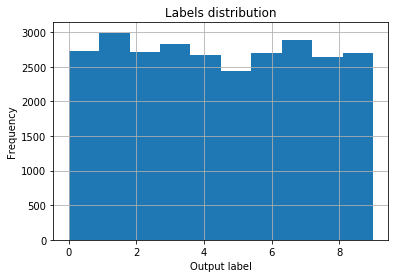

In [93]:
%matplotlib inline
# Labels frequency distribution 
y_train.hist()
plt.xlabel("Output label")
plt.ylabel("Frequency")
plt.title('Labels distribution')
plt.show()

### Visualize a single case

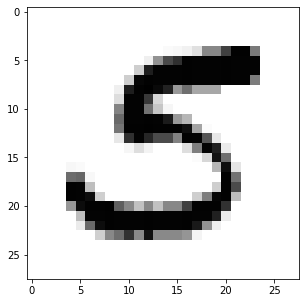

In [94]:
# Establish figure size
plt.rcParams['figure.figsize'] = (5.0, 5.0)
# Select only first observation and reshape to 28  * 28 matrix
sampleimage =  X_train.iloc[1].values.reshape(28, 28)
# Plot image in grey scale
im = plt.imshow(sampleimage, cmap='Greys')
plt.show()

## Logistic regression model

In [7]:
# Instantiate the logisti regression model
model_log = LogisticRegression(multi_class="auto",random_state=9)
# Fit the LR model
model_log.fit(X_train, y_train)

c:\users\alfa2\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\alfa2\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=9, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [9]:
# Validation set accuracy
model_log.score(X_val, y_val )

0.8969387755102041

In [84]:
# Generate test_set predictions
predictions = model_log.predict(test_set)

In [86]:
# Format predictions (Kaggle submission)
predictions = pd.DataFrame({'ImageId': list(range(1, len(predictions)+1)),'label': predictions})
prediction = pd.DataFrame(predictions).to_csv('D:/kaggle_submissions/predictions.csv', index=False)

Kaggle public score : 0.89628

### Clustering for dimensionalty reduction

In [103]:
# Preprocess data with K means prior to trainning
pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=90)),
    ("log_reg", LogisticRegression()),
])
# Fit a logistic regression model
pipeline.fit(X_train, y_train)

c:\users\alfa2\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\alfa2\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Pipeline(memory=None,
         steps=[('kmeans',
                 KMeans(algorithm='auto', copy_x=True, init='k-means++',
                        max_iter=300, n_clusters=90, n_init=10, n_jobs=None,
                        precompute_distances='auto', random_state=None,
                        tol=0.0001, verbose=0)),
                ('log_reg',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='warn', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [106]:
# Validation set accuracy
pipeline.score(X_val, y_val)

0.9289115646258503

In [107]:
# Generate test_set predictions
k_means_preds = pipeline.predict(test_set)

In [108]:
# Format predictions (Kaggle submission)
k_means_preds = pd.DataFrame({'ImageId': list(range(1, len(k_means_preds)+1)),'label': predictions})
k_means_pred = pd.DataFrame(k_means_preds).to_csv('D:/kaggle_submissions/k_means_preds.csv', index=False)

Kaggle public score : 0.90485